# MLP algorithm


## Data formatting for the algorithm

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

df = pd.read_csv('../data_clean/processed_data_with_features.csv')

df.head()

,DATE,SYMBOL,TIME,MID_OPEN,DATE_FORMATTED,DATETIME,DAY_OF_THE_WEEK,HOUR_OF_DAY,LOG_RETURN,vol_5,mean_5,sr_5,skew_5,kurt_5,min_5,max_5,zscore_5,log_momentum_5,ewm_5,bb_upper_5,bb_lower_5,mdd_5,vol_10,mean_10,sr_10,skew_10,kurt_10,min_10,max_10,zscore_10,log_momentum_10,ewm_10,bb_upper_10,bb_lower_10,mdd_10,vol_14,mean_14,sr_14,skew_14,kurt_14,min_14,max_14,zscore_14,log_momentum_14,ewm_14,bb_upper_14,bb_lower_14,mdd_14,vol_20,mean_20,sr_20,skew_20,kurt_20,min_20,max_20,zscore_20,log_momentum_20,ewm_20,bb_upper_20,bb_lower_20,mdd_20,vol_32,mean_32,sr_32,skew_32,kurt_32,min_32,max_32,zscore_32,log_momentum_32,ewm_32,bb_upper_32,bb_lower_32,mdd_32,vol_45,mean_45,sr_45,skew_45,kurt_45,min_45,max_45,zscore_45,log_momentum_45,ewm_45,bb_upper_45,bb_lower_45,mdd_45,vol_60,mean_60,sr_60,skew_60,kurt_60,min_60,max_60,zscore_60,log_momentum_60,ewm_60,bb_upper_60,bb_lower_60,mdd_60,ema_12,ema_26,macd,macd_signal,macd_hist
0,20211201,A,09:30:00,152.190,2021-12-01,2021-12-01 09:30:00,Wednesday,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.190000,152.190000,0.000000,0.000000,0.000000
1,20211201,A,09:40:00,150.490,2021-12-01,2021-12-01 09:40:00,Wednesday,9,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,151.928462,152.064074,-0.135613,-0.027123,-0.108490
2,20211201,A,09:50:00,151.475,2021-12-01,2021-12-01 09:50:00,Wednesday,9,0.006524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010651,NaN,NaN,NaN,151.858698,152.020439,-0.161741,-0.054046,-0.107695
3,20211201,A,10:00:00,150.510,2021-12-01,2021-12-01 10:00:00,Wednesday,10,-0.006391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010511,NaN,NaN,NaN,151.651206,151.908555,-0.257348,-0.094707,-0.162642
4,20211201,A,10:10:00,151.960,2021-12-01,2021-12-01 10:10:00,Wednesday,10,0.009588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009852,NaN,NaN,NaN,151.698713,151.912365,-0.213652,-0.118496,-0.095157


In [2]:
# Define a mapping from day name to number (e.g., Monday=0, ..., Sunday=6)
day_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Apply the mapping to the column
df['DAY_OF_THE_WEEK'] = df['DAY_OF_THE_WEEK'].map(day_map)

df.head()

,DATE,SYMBOL,TIME,MID_OPEN,DATE_FORMATTED,DATETIME,DAY_OF_THE_WEEK,HOUR_OF_DAY,LOG_RETURN,vol_5,mean_5,sr_5,skew_5,kurt_5,min_5,max_5,zscore_5,log_momentum_5,ewm_5,bb_upper_5,bb_lower_5,mdd_5,vol_10,mean_10,sr_10,skew_10,kurt_10,min_10,max_10,zscore_10,log_momentum_10,ewm_10,bb_upper_10,bb_lower_10,mdd_10,vol_14,mean_14,sr_14,skew_14,kurt_14,min_14,max_14,zscore_14,log_momentum_14,ewm_14,bb_upper_14,bb_lower_14,mdd_14,vol_20,mean_20,sr_20,skew_20,kurt_20,min_20,max_20,zscore_20,log_momentum_20,ewm_20,bb_upper_20,bb_lower_20,mdd_20,vol_32,mean_32,sr_32,skew_32,kurt_32,min_32,max_32,zscore_32,log_momentum_32,ewm_32,bb_upper_32,bb_lower_32,mdd_32,vol_45,mean_45,sr_45,skew_45,kurt_45,min_45,max_45,zscore_45,log_momentum_45,ewm_45,bb_upper_45,bb_lower_45,mdd_45,vol_60,mean_60,sr_60,skew_60,kurt_60,min_60,max_60,zscore_60,log_momentum_60,ewm_60,bb_upper_60,bb_lower_60,mdd_60,ema_12,ema_26,macd,macd_signal,macd_hist
0,20211201,A,09:30:00,152.190,2021-12-01,2021-12-01 09:30:00,2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.190000,152.190000,0.000000,0.000000,0.000000
1,20211201,A,09:40:00,150.490,2021-12-01,2021-12-01 09:40:00,2,9,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,151.928462,152.064074,-0.135613,-0.027123,-0.108490
2,20211201,A,09:50:00,151.475,2021-12-01,2021-12-01 09:50:00,2,9,0.006524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010651,NaN,NaN,NaN,151.858698,152.020439,-0.161741,-0.054046,-0.107695
3,20211201,A,10:00:00,150.510,2021-12-01,2021-12-01 10:00:00,2,10,-0.006391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010511,NaN,NaN,NaN,151.651206,151.908555,-0.257348,-0.094707,-0.162642
4,20211201,A,10:10:00,151.960,2021-12-01,2021-12-01 10:10:00,2,10,0.009588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009852,NaN,NaN,NaN,151.698713,151.912365,-0.213652,-0.118496,-0.095157


In [3]:
day_dummies = pd.get_dummies(df['DAY_OF_THE_WEEK'], prefix='DAY').astype(int)

df = pd.concat([df, day_dummies], axis=1)
df.drop(columns='DAY_OF_THE_WEEK', inplace=True)

hour_dummies = pd.get_dummies(df['HOUR_OF_DAY'], prefix='HOUR').astype(int)
df = pd.concat([df, hour_dummies], axis=1)
df.drop(columns='HOUR_OF_DAY', inplace=True)

df.head()

,DATE,SYMBOL,TIME,MID_OPEN,DATE_FORMATTED,DATETIME,LOG_RETURN,vol_5,mean_5,sr_5,skew_5,kurt_5,min_5,max_5,zscore_5,log_momentum_5,ewm_5,bb_upper_5,bb_lower_5,mdd_5,vol_10,mean_10,sr_10,skew_10,kurt_10,min_10,max_10,zscore_10,log_momentum_10,ewm_10,bb_upper_10,bb_lower_10,mdd_10,vol_14,mean_14,sr_14,skew_14,kurt_14,min_14,max_14,zscore_14,log_momentum_14,ewm_14,bb_upper_14,bb_lower_14,mdd_14,vol_20,mean_20,sr_20,skew_20,kurt_20,min_20,max_20,zscore_20,log_momentum_20,ewm_20,bb_upper_20,bb_lower_20,mdd_20,vol_32,mean_32,sr_32,skew_32,kurt_32,min_32,max_32,zscore_32,log_momentum_32,ewm_32,bb_upper_32,bb_lower_32,mdd_32,vol_45,mean_45,sr_45,skew_45,kurt_45,min_45,max_45,zscore_45,log_momentum_45,ewm_45,bb_upper_45,bb_lower_45,mdd_45,vol_60,mean_60,sr_60,skew_60,kurt_60,min_60,max_60,zscore_60,log_momentum_60,ewm_60,bb_upper_60,bb_lower_60,mdd_60,ema_12,ema_26,macd,macd_signal,macd_hist,DAY_0,DAY_1,DAY_2,DAY_3,DAY_4,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15
0,20211201,A,09:30:00,152.190,2021-12-01,2021-12-01 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.190000,152.190000,0.000000,0.000000,0.000000,0,0,1,0,0,1,0,0,0,0,0,0
1,20211201,A,09:40:00,150.490,2021-12-01,2021-12-01 09:40:00,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,151.928462,152.064074,-0.135613,-0.027123,-0.108490,0,0,1,0,0,1,0,0,0,0,0,0
2,20211201,A,09:50:00,151.475,2021-12-01,2021-12-01 09:50:00,0.006524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010651,NaN,NaN,NaN,151.858698,152.020439,-0.161741,-0.054046,-0.107695,0,0,1,0,0,1,0,0,0,0,0,0
3,20211201,A,10:00:00,150.510,2021-12-01,2021-12-01 10:00:00,-0.006391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010511,NaN,NaN,NaN,151.651206,151.908555,-0.257348,-0.094707,-0.162642,0,0,1,0,0,0,1,0,0,0,0,0
4,20211201,A,10:10:00,151.960,2021-12-01,2021-12-01 10:10:00,0.009588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009852,NaN,NaN,NaN,151.698713,151.912365,-0.213652,-0.118496,-0.095157,0,0,1,0,0,0,1,0,0,0,0,0


In [4]:
# First, compute the new columns
df['NEXT_LOG_RETURN'] = df.groupby('SYMBOL')['LOG_RETURN'].shift(-1)
df['NEXT_DIRECTION'] = np.where(df['NEXT_LOG_RETURN'] > 0, 1,
                         np.where(df['NEXT_LOG_RETURN'] < 0, -1, 0))

# Get the index of 'LOG_RETURNS' to insert after it
log_ret_idx = df.columns.get_loc('LOG_RETURN')

# Remove the new columns from the end if already appended
next_return = df.pop('NEXT_LOG_RETURN')
next_direction = df.pop('NEXT_DIRECTION')

# Insert them right after 'LOG_RETURNS'
df.insert(log_ret_idx + 1, 'NEXT_LOG_RETURN', next_return)
df.insert(log_ret_idx + 2, 'NEXT_DIRECTION', next_direction)

df.head()

,DATE,SYMBOL,TIME,MID_OPEN,DATE_FORMATTED,DATETIME,LOG_RETURN,NEXT_LOG_RETURN,NEXT_DIRECTION,vol_5,mean_5,sr_5,skew_5,kurt_5,min_5,max_5,zscore_5,log_momentum_5,ewm_5,bb_upper_5,bb_lower_5,mdd_5,vol_10,mean_10,sr_10,skew_10,kurt_10,min_10,max_10,zscore_10,log_momentum_10,ewm_10,bb_upper_10,bb_lower_10,mdd_10,vol_14,mean_14,sr_14,skew_14,kurt_14,min_14,max_14,zscore_14,log_momentum_14,ewm_14,bb_upper_14,bb_lower_14,mdd_14,vol_20,mean_20,sr_20,skew_20,kurt_20,min_20,max_20,zscore_20,log_momentum_20,ewm_20,bb_upper_20,bb_lower_20,mdd_20,vol_32,mean_32,sr_32,skew_32,kurt_32,min_32,max_32,zscore_32,log_momentum_32,ewm_32,bb_upper_32,bb_lower_32,mdd_32,vol_45,mean_45,sr_45,skew_45,kurt_45,min_45,max_45,zscore_45,log_momentum_45,ewm_45,bb_upper_45,bb_lower_45,mdd_45,vol_60,mean_60,sr_60,skew_60,kurt_60,min_60,max_60,zscore_60,log_momentum_60,ewm_60,bb_upper_60,bb_lower_60,mdd_60,ema_12,ema_26,macd,macd_signal,macd_hist,DAY_0,DAY_1,DAY_2,DAY_3,DAY_4,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15
0,20211201,A,09:30:00,152.190,2021-12-01,2021-12-01 09:30:00,NaN,-0.011233,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.190000,152.190000,0.000000,0.000000,0.000000,0,0,1,0,0,1,0,0,0,0,0,0
1,20211201,A,09:40:00,150.490,2021-12-01,2021-12-01 09:40:00,-0.011233,0.006524,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011233,NaN,NaN,NaN,151.928462,152.064074,-0.135613,-0.027123,-0.108490,0,0,1,0,0,1,0,0,0,0,0,0
2,20211201,A,09:50:00,151.475,2021-12-01,2021-12-01 09:50:00,0.006524,-0.006391,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010651,NaN,NaN,NaN,151.858698,152.020439,-0.161741,-0.054046,-0.107695,0,0,1,0,0,1,0,0,0,0,0,0
3,20211201,A,10:00:00,150.510,2021-12-01,2021-12-01 10:00:00,-0.006391,0.009588,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010511,NaN,NaN,NaN,151.651206,151.908555,-0.257348,-0.094707,-0.162642,0,0,1,0,0,0,1,0,0,0,0,0
4,20211201,A,10:10:00,151.960,2021-12-01,2021-12-01 10:10:00,0.009588,-0.001119,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009852,NaN,NaN,NaN,151.698713,151.912365,-0.213652,-0.118496,-0.095157,0,0,1,0,0,0,1,0,0,0,0,0


In [5]:
columns = [col for col in df.columns if not col.startswith(('zscore', 'ema')) and not col in ['DATE_FORMATTED', 'DATE', 'TIME', 'MID_OPEN']]

df = df[columns].sort_values(by='DATETIME').dropna()

df.head()

,SYMBOL,DATETIME,LOG_RETURN,NEXT_LOG_RETURN,NEXT_DIRECTION,vol_5,mean_5,sr_5,skew_5,kurt_5,min_5,max_5,log_momentum_5,ewm_5,bb_upper_5,bb_lower_5,mdd_5,vol_10,mean_10,sr_10,skew_10,kurt_10,min_10,max_10,log_momentum_10,ewm_10,bb_upper_10,bb_lower_10,mdd_10,vol_14,mean_14,sr_14,skew_14,kurt_14,min_14,max_14,log_momentum_14,ewm_14,bb_upper_14,bb_lower_14,mdd_14,vol_20,mean_20,sr_20,skew_20,kurt_20,min_20,max_20,log_momentum_20,ewm_20,bb_upper_20,bb_lower_20,mdd_20,vol_32,mean_32,sr_32,skew_32,kurt_32,min_32,max_32,log_momentum_32,ewm_32,bb_upper_32,bb_lower_32,mdd_32,vol_45,mean_45,sr_45,skew_45,kurt_45,min_45,max_45,log_momentum_45,ewm_45,bb_upper_45,bb_lower_45,mdd_45,vol_60,mean_60,sr_60,skew_60,kurt_60,min_60,max_60,log_momentum_60,ewm_60,bb_upper_60,bb_lower_60,mdd_60,macd,macd_signal,macd_hist,DAY_0,DAY_1,DAY_2,DAY_3,DAY_4,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15
89298,CRWD,2021-12-02 13:10:00,-0.011525,-0.005318,-1,0.006909,-0.000652,-0.094328,-1.175062,0.812262,-0.011525,0.005194,-0.003259,-0.002925,0.013167,-0.014470,-0.011165,0.005925,0.000094,0.015804,-1.115465,0.255164,-0.011525,0.006278,0.000936,-0.000717,0.011944,-0.011757,-0.023418,0.005470,0.001088,0.198940,-1.271007,1.120422,-0.011525,0.007330,0.015235,-0.000148,0.012029,-0.009852,-0.030302,0.007098,0.001087,0.153121,-0.500572,0.045957,-0.012933,0.014947,0.021738,0.000116,0.015284,-0.013110,-0.035577,0.009220,0.000509,0.055190,-0.527632,1.629234,-0.026575,0.020941,0.016284,-0.000184,0.018949,-0.017932,-0.050976,0.008709,-0.000098,-0.011304,-0.284465,1.169093,-0.026575,0.020941,-0.004430,-0.000998,0.017319,-0.017516,-0.050976,0.008084,-0.001020,-0.126150,-0.106643,1.272085,-0.026575,0.020941,-0.061185,-0.002088,0.015148,-0.017187,-0.094275,0.924344,0.536478,0.387866,0,0,0,1,0,0,0,0,0,1,0,0
168716,HBAN,2021-12-02 13:10:00,0.001319,0.001317,1,0.000861,0.000792,0.920447,0.542438,-1.477735,0.000000,0.001982,0.003962,0.000962,0.002514,-0.000929,-0.002639,0.002552,0.000927,0.363140,0.094043,2.165662,-0.003999,0.005992,0.009269,0.000985,0.006032,-0.004178,-0.011877,0.002478,0.001234,0.498241,0.000066,0.895077,-0.003999,0.005992,0.017282,0.000949,0.006190,-0.003721,-0.015836,0.002831,0.000998,0.352654,-0.211899,-0.038466,-0.004692,0.005992,0.019967,0.000823,0.006660,-0.004664,-0.019136,0.003281,0.000561,0.171008,-0.092731,-0.698888,-0.005733,0.006069,0.017953,0.000468,0.007122,-0.006000,-0.027054,0.003461,0.000044,0.012707,-0.079304,-0.751136,-0.007338,0.006069,0.001979,0.000046,0.006966,-0.006878,-0.032163,0.003502,-0.000115,-0.032820,-0.091153,-0.749223,-0.007338,0.006069,-0.006895,-0.000417,0.006888,-0.007118,-0.042843,0.051568,0.029152,0.022416,0,0,0,1,0,0,0,0,0,1,0,0
134440,ETR,2021-12-02 13:10:00,-0.000194,0.000437,1,0.001827,0.000282,0.154450,1.765646,3.470966,-0.001267,0.003409,0.001411,0.000506,0.003937,-0.003372,-0.003549,0.001811,0.000962,0.531350,0.384797,-1.518234,-0.001267,0.003617,0.009625,0.000595,0.004585,-0.002660,-0.009771,0.001892,0.000691,0.365293,0.160095,-1.332448,-0.001909,0.003617,0.009674,0.000578,0.004474,-0.003092,-0.009820,0.002106,0.000683,0.324221,0.148073,-1.207660,-0.002793,0.004083,0.013658,0.000519,0.004896,-0.003530,-0.013757,0.002263,0.000370,0.163414,0.327322,-0.559907,-0.003755,0.005332,0.011836,0.000406,0.004897,-0.004157,-0.018035,0.002142,0.000040,0.018685,0.381777,-0.082237,-0.004259,0.005332,0.001801,0.000322,0.004323,-0.004243,-0.018035,0.002289,0.000246,0.107334,0.822290,1.685434,-0.004259,0.008379,0.014743,0.000256,0.004824,-0.004333,-0.018035,0.255732,0.178503,0.077229,0,0,0,1,0,0,0,0,0,1,0,0
170388,HD,2021-12-02 13:10:00,-0.001574,0.001672,1,0.001302,0.000262,0.200889,-0.444821,-0.648788,-0.001574,0.001720,0.001308,-0.000124,0.002865,-0.002342,-0.003194,0.001493,0.000417,0.279604,-1.057781,0.176480,-0.002530,0.001965,0.004174,0.000268,0.003403,-0.002568,-0.008558,0.001980,0.000795,0.401471,0.330278,-0.034309,-0.002530,0.004578,0.011127,0.000356,0.004754,-0.003165,-0.012934,0.002402,0.000619,0.257642,-0.088271

In [6]:
def time_split(df, train_ratio=0.8):
    split_point = int(len(df) * train_ratio)
    df = df.sort_values('DATETIME')
    train_df = df.iloc[:split_point].copy()
    test_df = df.iloc[split_point:].copy()
    return train_df, test_df

def compute_groupwise_stats(train_df, group_col, feature_cols):
    stats = train_df.groupby(group_col)[feature_cols].agg(['mean', 'std'])
    # Flatten MultiIndex columns
    stats.columns = ['_'.join(col) for col in stats.columns]
    return stats

def apply_groupwise_standardization(df, stats, group_col, feature_cols):
    df = df.copy()
    for feature in feature_cols:
        mean_col = f"{feature}_mean"
        std_col = f"{feature}_std"
        df = df.merge(stats[[mean_col, std_col]], left_on=group_col, right_index=True, how='left')
        df[feature] = (df[feature] - df[mean_col]) / (df[std_col] + 1e-8)  # avoid div by 0
        df.drop(columns=[mean_col, std_col], inplace=True)
    return df


def compute_sharpe_ratio(returns, periods_per_year=39*252):
    return np.sqrt(periods_per_year) * returns.mean() / returns.std()

def compute_max_drawdown(cum_returns):
    return (cum_returns / cum_returns.cummax() - 1).min()

## Train test splitting

In [7]:
non_feature_cols = ['SYMBOL', 'MID_OPEN', 'DATETIME', 'TARGET', 'LOG_RETURN', 'NEXT_LOG_RETURN', 'NEXT_DIRECTION'] + [col for col in df.columns if col.startswith(('DAY', 'HOUR'))]
feature_cols = [col for col in df.columns if col not in non_feature_cols]


train_df, test_df = time_split(df, train_ratio=0.5)

stats = compute_groupwise_stats(train_df, group_col='SYMBOL', feature_cols=feature_cols)


train_df = apply_groupwise_standardization(train_df, stats, group_col='SYMBOL', feature_cols=feature_cols)
test_df = apply_groupwise_standardization(test_df, stats, group_col='SYMBOL', feature_cols=feature_cols)

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# ==== Select features and target ====
selected_features = [col for col in df.columns if col not in ['SYMBOL', 'DATETIME', 'NEXT_LOG_RETURN', 'NEXT_DIRECTION']]
target_col = 'NEXT_DIRECTION'

# ==== Prepare data ====
X_train = train_df[selected_features].values
y_train = ((train_df[target_col].values > 0).astype(int))  # convert -1/1 to 0/1

X_test = test_df[selected_features].values
y_test = ((test_df[target_col].values > 0).astype(int))  # convert -1/1 to 0/1

## Training of a single seed model

Iteration 1, loss = 0.69539152
Validation score: 0.526273
Iteration 2, loss = 0.68958921
Validation score: 0.532226
Iteration 3, loss = 0.68746512
Validation score: 0.536826
Iteration 4, loss = 0.68591917
Validation score: 0.542399
Iteration 5, loss = 0.68469606
Validation score: 0.542670
Iteration 6, loss = 0.68360244
Validation score: 0.541209
Iteration 7, loss = 0.68265613
Validation score: 0.548352
Iteration 8, loss = 0.68185459
Validation score: 0.549759
Iteration 9, loss = 0.68100947
Validation score: 0.550841
Iteration 10, loss = 0.68022119
Validation score: 0.548352


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


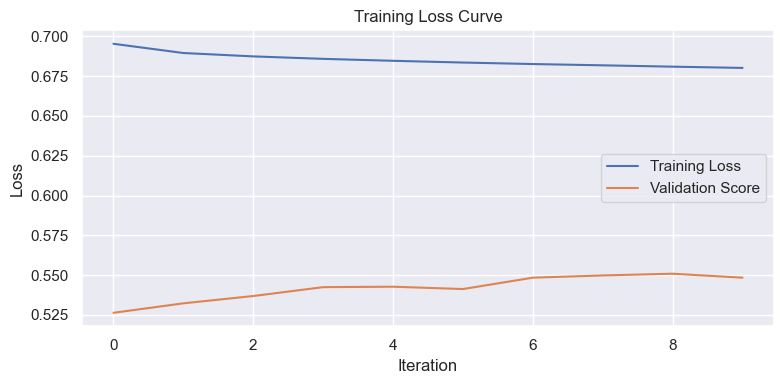


Test Accuracy: 0.5122
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.59      0.54     90642
           1       0.53      0.44      0.48     94148

    accuracy                           0.51    184790
   macro avg       0.51      0.51      0.51    184790
weighted avg       0.51      0.51      0.51    184790

Sharpe Ratio (Strategy): 0.7689
Max Drawdown (Strategy): -0.0200


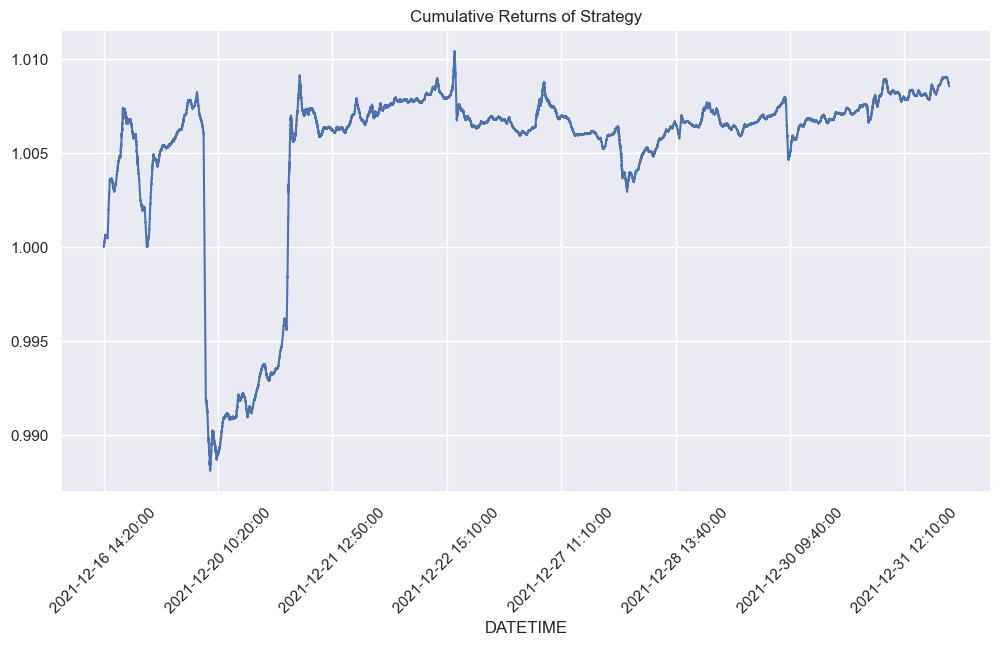

Sharpe Ratio (Strategy): 1.3841
Max Drawdown (Strategy): -0.0246


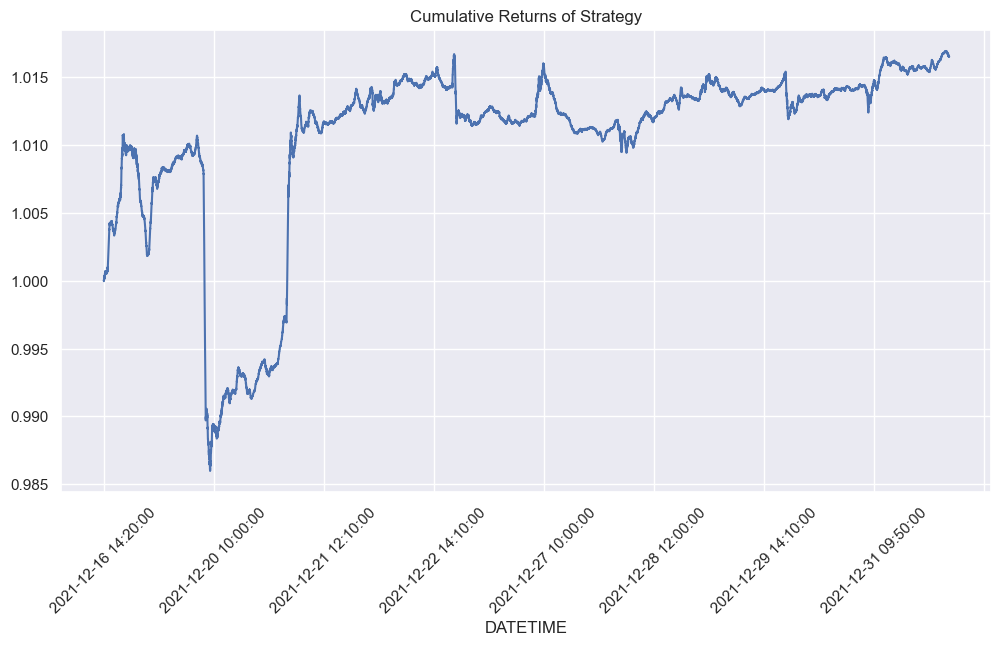

Sharpe Ratio (Strategy): 1.4464
Max Drawdown (Strategy): -0.0235


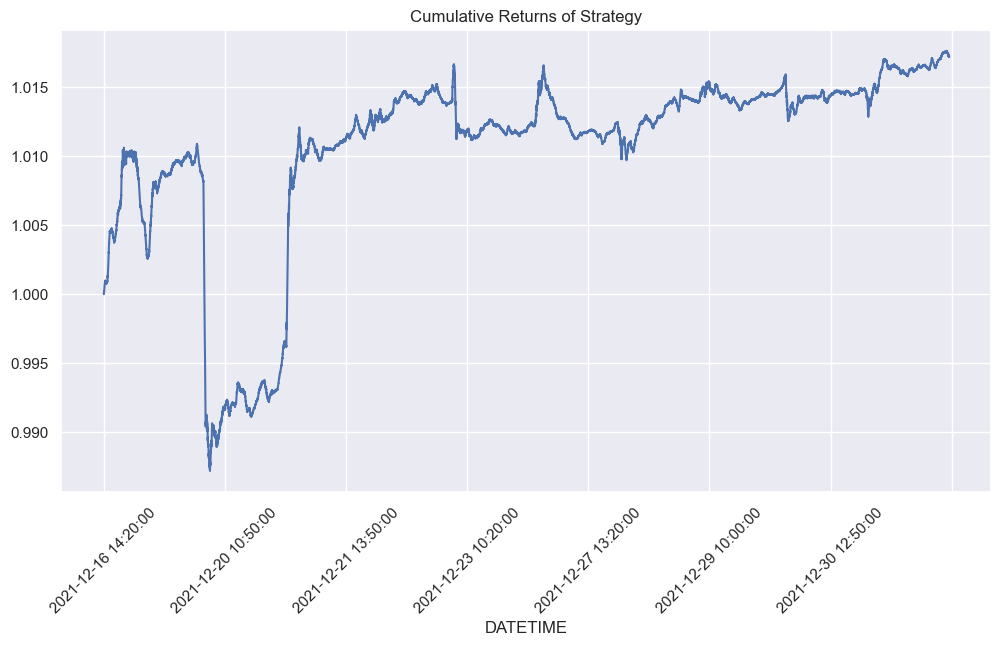

Sharpe Ratio (Strategy): 4.4798
Max Drawdown (Strategy): -0.0271


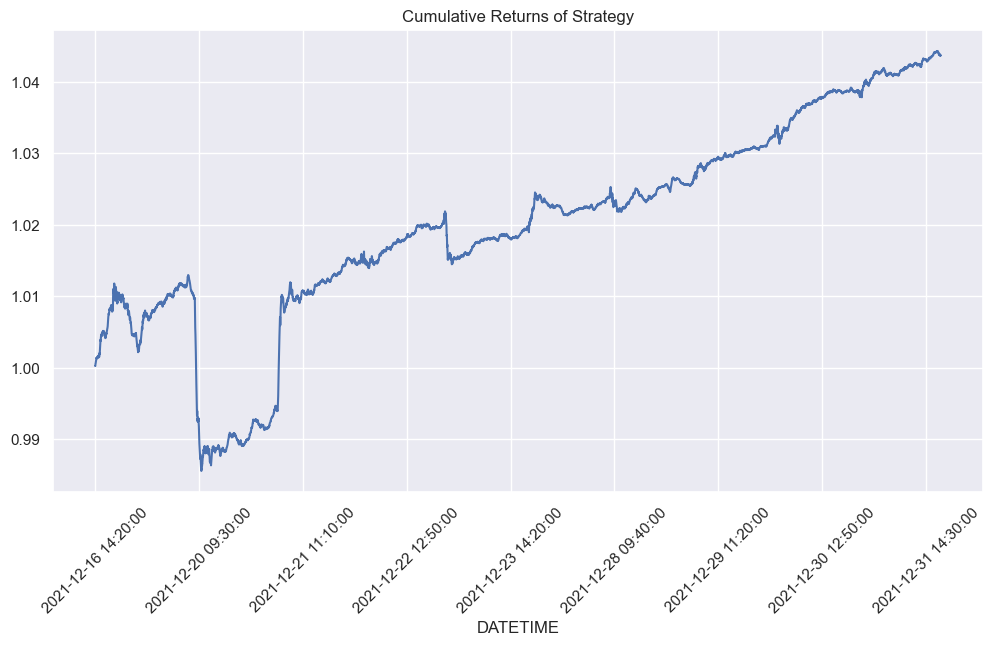

In [9]:
# ==== Define Neural Network ====
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='sgd',
    alpha=1e-4,
    learning_rate='adaptive',
    max_iter=10,
    batch_size=128,
    random_state=3,
    early_stopping=True,
    verbose=True, 
    # dropout=0.2
)

# ==== Train model ====
mlp.fit(X_train, y_train)

# ==== Plot Training Loss Curve ====
plt.figure(figsize=(8, 4))
# plt.plot(mlp.validation_scores_, label='Validation Score')
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.plot(mlp.validation_scores_, label='Validation Score')
plt.title("Training Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ==== Evaluate ====
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nTest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

test_df['PREDICTION'] = y_pred

y_pred_train = mlp.predict(X_train)

result_df_train = train_df[['SYMBOL', 'DATETIME', 'LOG_RETURN', 'NEXT_LOG_RETURN', 'NEXT_DIRECTION']].copy()

result_df_train['NEXT_DIRECTION'] = np.where(result_df_train['NEXT_DIRECTION'] == 1, 1, 0)
result_df_train['PREDICTION'] = y_pred_train
result_df_train['CORRECT'] = result_df_train['NEXT_DIRECTION'] == result_df_train['PREDICTION']

# result_df_train

N = 100

best_symbols = result_df_train.groupby('SYMBOL')['CORRECT'].mean().sort_values(ascending=False).index[:N].tolist()
best_symbols_trimmed = result_df_train.groupby('SYMBOL')['CORRECT'].mean().sort_values(ascending=False).index[int(N*0.1):N].tolist()

# result_df_train.groupby('SYMBOL')['CORRECT'].mean().sort_values(ascending=False)

# -------------------------------------------------------- MODEL GENERAL --------------------------------------------------------

result_df = test_df[['SYMBOL', 'DATETIME', 'LOG_RETURN', 'NEXT_LOG_RETURN','NEXT_DIRECTION', 'PREDICTION'] \
                    + [col for col in df.columns if col.startswith(('DAY', 'HOUR'))]].set_index(['DATETIME'])

# result_df = result_df[result_df['SYMBOL'].isin(best_symbols)].copy()

result_df.loc[:,'NEXT_RETURN'] = np.exp(result_df['NEXT_LOG_RETURN']) - 1

result_df.loc[:,'PREDICTION'] = np.where(result_df['PREDICTION'] == 1, 1, -1)

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN']
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN'] / result_df['SYMBOL'].nunique()
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

sharpe_ratio_strategy = compute_sharpe_ratio(result_df['ret_strategy'])
max_drawdown_strategy = compute_max_drawdown(result_df['cumprod_strategy'])

print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.4f}")

result_df['cumprod_strategy'].plot(figsize=(12, 6), title='Cumulative Returns of Strategy', grid=True)
plt.xticks(rotation=45)
plt.show()

day_columns = [col for col in result_df.columns if col.startswith('DAY_')]
result_df['DAY_OF_THE_WEEK'] = result_df[day_columns].idxmax(axis=1).str.extract(r'DAY_(\d)').astype(int)
result_df.drop(columns=day_columns, inplace=True)

hour_columns = [col for col in result_df.columns if col.startswith('HOUR_')]
result_df['HOUR_OF_DAY'] = result_df[hour_columns].idxmax(axis=1).str.extract(r'HOUR_(\d+)').astype(int)
result_df.drop(columns=hour_columns, inplace=True)

result_df['CORRECT'] = result_df['NEXT_DIRECTION'] == result_df['PREDICTION']

best_test_symbols = result_df.groupby('SYMBOL')['CORRECT'].mean().sort_values(ascending=False).index[:N].tolist()

common_symbols = set(best_symbols) & set(best_test_symbols)

# len(common_symbols), len(best_symbols), len(best_test_symbols)

# -------------------------------------------------------- BEST SYMBOLS --------------------------------------------------------

result_df = test_df[['SYMBOL', 'DATETIME', 'LOG_RETURN', 'NEXT_LOG_RETURN','NEXT_DIRECTION', 'PREDICTION'] \
                    + [col for col in df.columns if col.startswith(('DAY', 'HOUR'))]].set_index(['DATETIME'])

result_df = result_df[result_df['SYMBOL'].isin(best_symbols)].copy()

result_df.loc[:,'NEXT_RETURN'] = np.exp(result_df['NEXT_LOG_RETURN']) - 1

result_df.loc[:,'PREDICTION'] = np.where(result_df['PREDICTION'] == 1, 1, -1)

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN']
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN'] / len(best_symbols)
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

sharpe_ratio_strategy = compute_sharpe_ratio(result_df['ret_strategy'])
max_drawdown_strategy = compute_max_drawdown(result_df['cumprod_strategy'])

print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.4f}")

result_df['cumprod_strategy'].plot(figsize=(12, 6), title='Cumulative Returns of Strategy', grid=True)
plt.xticks(rotation=45)
plt.show()

# -------------------------------------------------------- BEST SYMBOLS TRIMMED --------------------------------------------------------

result_df = test_df[['SYMBOL', 'DATETIME', 'LOG_RETURN', 'NEXT_LOG_RETURN','NEXT_DIRECTION', 'PREDICTION'] \
                    + [col for col in df.columns if col.startswith(('DAY', 'HOUR'))]].set_index(['DATETIME'])

result_df = result_df[result_df['SYMBOL'].isin(best_symbols_trimmed)].copy()

result_df.loc[:,'NEXT_RETURN'] = np.exp(result_df['NEXT_LOG_RETURN']) - 1

result_df.loc[:,'PREDICTION'] = np.where(result_df['PREDICTION'] == 1, 1, -1)

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN']
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN'] / len(best_symbols_trimmed)
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

sharpe_ratio_strategy = compute_sharpe_ratio(result_df['ret_strategy'])
max_drawdown_strategy = compute_max_drawdown(result_df['cumprod_strategy'])

print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.4f}")

result_df['cumprod_strategy'].plot(figsize=(12, 6), title='Cumulative Returns of Strategy', grid=True)
plt.xticks(rotation=45)
plt.show()

# -------------------------------------------------------- COMMON SYMBOLS --------------------------------------------------------

result_df = test_df[['SYMBOL', 'DATETIME', 'LOG_RETURN', 'NEXT_LOG_RETURN','NEXT_DIRECTION', 'PREDICTION'] \
                    + [col for col in df.columns if col.startswith(('DAY', 'HOUR'))]].set_index(['DATETIME'])

result_df = result_df[result_df['SYMBOL'].isin(common_symbols)].copy()

result_df.loc[:,'NEXT_RETURN'] = np.exp(result_df['NEXT_LOG_RETURN']) - 1

result_df.loc[:,'PREDICTION'] = np.where(result_df['PREDICTION'] == 1, 1, -1)

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN']
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN'] / len(common_symbols)
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

sharpe_ratio_strategy = compute_sharpe_ratio(result_df['ret_strategy'])
max_drawdown_strategy = compute_max_drawdown(result_df['cumprod_strategy'])

print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.4f}")

result_df['cumprod_strategy'].plot(figsize=(12, 6), title='Cumulative Returns of Strategy', grid=True)
plt.xticks(rotation=45)
plt.show()

## Full backtest with multiple seeds and multiple interations

In [10]:


import os
from concurrent.futures import ProcessPoolExecutor, as_completed

output_dir = 'mlp_data'

def run_experiment(seed, max_iter, X_train, y_train, X_test, y_test, train_df, test_df, df, output_dir):
    mlp = MLPClassifier(
        hidden_layer_sizes=(128,64),
        activation='relu',
        solver='sgd',
        alpha=1e-4,
        learning_rate='adaptive',
        max_iter=max_iter,
        batch_size=128,
        random_state=seed,
        early_stopping=True,
        verbose=False
    )
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # four strategies pipelines builder
    strategies = {
        'all': lambda res_df_train: res_df_train['SYMBOL'].unique().tolist(),
        'top100': lambda res: res.groupby('SYMBOL')['CORRECT'].mean().nlargest(100).index.tolist(),
        'trimmed100': lambda res: res.groupby('SYMBOL')['CORRECT']
                                   .mean()
                                   .sort_values(ascending=False)
                                   .iloc[int(0.1*100):100]
                                   .index.tolist(),
        'common': None  # to be handled after forecasts
    }

    # invert predictions for strategy use
    test_df_copy = test_df.copy()
    test_df_copy['PREDICTION'] = y_pred

    train_df_copy = train_df.copy()
    train_df_copy['PREDICTION'] = mlp.predict(X_train)
    train_df_copy['CORRECT'] = train_df_copy['NEXT_DIRECTION'] == train_df_copy['PREDICTION']

    best = strategies['top100'](train_df_copy)
    trimmed = strategies['trimmed100'](train_df_copy)

    metrics = {}
    results = {}

    # "all", "top100", "trimmed100"
    for name, selector in [('all', strategies['all']), ('top100', lambda _: best), ('trimmed100', lambda _: trimmed)]:
        syms = selector(train_df_copy)
        res = backtest_strategy(test_df_copy, syms, df)
        metrics[(seed, max_iter, name)] = {
            'accuracy': acc,
            'sharpe': res['sharpe'],
            'max_dd': res['max_drawdown']
        }
        results[(seed, max_iter, name)] = res['cumret']

    # common: need common between train and test best
    test_df_copy['CORRECT'] = test_df_copy['NEXT_DIRECTION'] == test_df_copy['PREDICTION']
    best_test = test_df_copy.groupby('SYMBOL')['CORRECT'].mean().nlargest(100).index.tolist()
    common = set(best) & set(best_test)
    res = backtest_strategy(test_df_copy, list(common), df)
    metrics[(seed, max_iter, 'common')] = {
        'accuracy': acc,
        'sharpe': res['sharpe'],
        'max_dd': res['max_drawdown']
    }
    results[(seed, max_iter, 'common')] = res['cumret']

    # save metrics & results; optionally plot here
    pd.DataFrame(metrics).T.to_pickle(os.path.join(output_dir, 'metrics.pkl'))
    pd.to_pickle(results, os.path.join(output_dir, 'curves.pkl'))

    return metrics, results

def backtest_strategy(res_df, symbols, df):
    df_sel = res_df[res_df['SYMBOL'].isin(symbols)].copy()
    df_sel['NEXT_RETURN'] = np.exp(df_sel['NEXT_LOG_RETURN']) - 1
    df_sel['PREDICTION'] = np.where(df_sel['PREDICTION'] == 1, 1, -1)
    df_sel['ret'] = df_sel['PREDICTION'] * df_sel['NEXT_RETURN'] / max(len(symbols),1)
    df_sel['cumret'] = (1 + df_sel['ret']).cumprod()
    sharpe = compute_sharpe_ratio(df_sel['ret'])
    max_dd = compute_max_drawdown(df_sel['cumret'])
    return {'sharpe': sharpe, 'max_drawdown': max_dd, 'cumret': df_sel['cumret']}

def multi_run(seeds, iters, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    all_metrics = {}
    all_results = {}

    for seed in seeds:
        for it in iters:
            print(f"Running seed={seed}, iter={it}")

            m, r = run_experiment(seed, it, X_train, y_train, X_test, y_test, train_df, test_df, df, output_dir)
            all_metrics.update(m); all_results.update(r)

    pd.DataFrame(all_metrics).T.to_csv(os.path.join(output_dir, 'metrics.csv'))
    pd.to_pickle(all_results, os.path.join(output_dir, 'curves.pkl'))
    return all_metrics, all_results

# def init_worker():
#     """Re-seed RNG in each subprocess for independence."""
#     np.random.seed(None)

# def worker(args):
#     seed, max_iter = args
#     # Optionally reseed NumPy inside the worker too
#     np.random.seed(seed)
#     # Assuming X_train etc. are globally accessible or passed in via closures
#     return run_experiment(seed, max_iter, X_train, y_train, X_test, y_test, train_df, test_df, df, output_dir)

# def parallel_multi_run(seeds, iters, output_dir, n_workers=None):
#     os.makedirs(output_dir, exist_ok=True)
#     param_grid = [(s, it) for s in seeds for it in iters]
#     all_metrics = {}
#     all_results = {}

#     with ProcessPoolExecutor(max_workers=n_workers, initializer=init_worker) as exe:
#         futures = {exe.submit(worker, params): params for params in param_grid}
#         for future in as_completed(futures):
#             seed, it = futures[future]
#             try:
#                 metrics, results = future.result()
#                 all_metrics.update(metrics)
#                 all_results.update(results)
#                 print(f"Completed seed={seed}, iter={it}")
#             except Exception as e:
#                 print(f"Error in seed={seed}, iter={it}: {e}")

#     # Save aggregated results
#     pd.DataFrame(all_metrics).T.to_csv(os.path.join(output_dir, 'metrics.csv'))
#     pd.to_pickle(all_results, os.path.join(output_dir, 'curves.pkl'))
#     return all_metrics, all_results


# seeds = list(range(10))
# iters = [5,10,15,20,25,30]
# metrics, results = parallel_multi_run(seeds, iters, 'arthur_output_dir', n_workers=4)

seeds = [i for i in range(10)]
iters = [5, 10, 15, 20, 25,30]
metrics, results = multi_run(seeds, iters, output_dir='mlp_data')


Running seed=0, iter=5


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=0, iter=10


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=0, iter=15


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=0, iter=20


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=0, iter=25


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=0, iter=30


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=1, iter=5


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=1, iter=10


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=1, iter=15


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=1, iter=20


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=1, iter=25


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=1, iter=30


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=2, iter=5


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=2, iter=10


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=2, iter=15


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=2, iter=20


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=2, iter=25


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=2, iter=30


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=3, iter=5


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=3, iter=10


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=3, iter=15


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=3, iter=20


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=3, iter=25


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=3, iter=30


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=4, iter=5


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=4, iter=10


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=4, iter=15


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=4, iter=20


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=4, iter=25


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=4, iter=30


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=5, iter=5


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=5, iter=10


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=5, iter=15


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=5, iter=20


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=5, iter=25


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=5, iter=30


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=6, iter=5


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=6, iter=10


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=6, iter=15


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=6, iter=20


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=6, iter=25


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=6, iter=30


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=7, iter=5


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=7, iter=10


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=7, iter=15


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=7, iter=20


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=7, iter=25


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=7, iter=30


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=8, iter=5


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=8, iter=10


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=8, iter=15


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=8, iter=20


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=8, iter=25


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=8, iter=30


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=9, iter=5


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=9, iter=10


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=9, iter=15


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=9, iter=20


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=9, iter=25


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Running seed=9, iter=30


/opt/anaconda3/envs/investmentepfl/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


## Now looking at the results of full backtest

In [38]:
df_results = pd.read_csv('./mlp_data/metrics.csv')

df_results.columns = ['seed', 'iterations', 'name', 'accuracy', 'sharpe', 'max_drawdown']
df_results.head()

,seed,iterations,name,accuracy,sharpe,max_drawdown
0,0,5,all,0.510985,1.145944,-0.015574
1,0,5,top100,0.510985,0.912500,-0.018771
2,0,5,trimmed100,0.510985,0.958526,-0.019369
3,0,5,common,0.510985,2.783947,-0.015304
4,0,10,all,0.509048,0.289847,-0.019069


In [39]:
df_results[(df_results['name'] == 'top100') & (df_results['iterations'] == 10)]

,seed,iterations,name,accuracy,sharpe,max_drawdown
5,0,10,top100,0.509048,0.575258,-0.021358
29,1,10,top100,0.509427,1.088550,-0.019398
53,2,10,top100,0.513448,1.189840,-0.020896
77,3,10,top100,0.512246,0.918553,-0.020749
101,4,10,top100,0.511370,1.533289,-0.022046
125,5,10,top100,0.512068,1.867419,-0.017584
149,6,10,top100,0.513632,2.134340,-0.021340
173,7,10,top100,0.510985,1.037575,-0.022961
197,8,10,top100,0.514508,1.921911,-0.016501
221,9,10,top100,0.514010,2.344472,-0.021286


In [40]:
df_results = df_results[df_results['name'] == 'all']

In [41]:
desc_df = df_results.groupby('iterations')['sharpe'].describe().reset_index()

desc_df


,iterations,count,mean,std,min,25%,50%,75%,max
0,5,10.0,0.873712,0.275525,0.518266,0.696987,0.777962,1.103038,1.357609
1,10,10.0,0.770033,0.443622,0.056297,0.498401,0.737255,1.114013,1.372986
2,15,10.0,0.501080,0.456326,-0.169609,0.090515,0.566806,0.840986,1.217744
3,20,10.0,0.343209,0.413493,-0.148012,0.135177,0.265148,0.373083,1.375402
4,25,10.0,0.102740,0.453297,-0.560543,-0.249224,0.116523,0.439185,0.729310
5,30,10.0,0.068211,0.348214,-0.560543,-0.159789,0.180260,0.311316,0.499528


In [42]:
df_results.groupby('iterations')['accuracy'].describe().reset_index()

,iterations,count,mean,std,min,25%,50%,75%,max
0,5,10.0,0.511103,0.001151,0.509140,0.510523,0.511040,0.511506,0.513226
1,10,10.0,0.512074,0.001882,0.509048,0.511081,0.512157,0.513586,0.514508
2,15,10.0,0.511333,0.002276,0.508328,0.509666,0.511104,0.513184,0.515109
3,20,10.0,0.511195,0.002182,0.508972,0.510075,0.510490,0.511939,0.516164
4,25,10.0,0.510426,0.002493,0.506310,0.508944,0.510282,0.511792,0.514660
5,30,10.0,0.510297,0.001914,0.506310,0.509576,0.510650,0.511459,0.512934


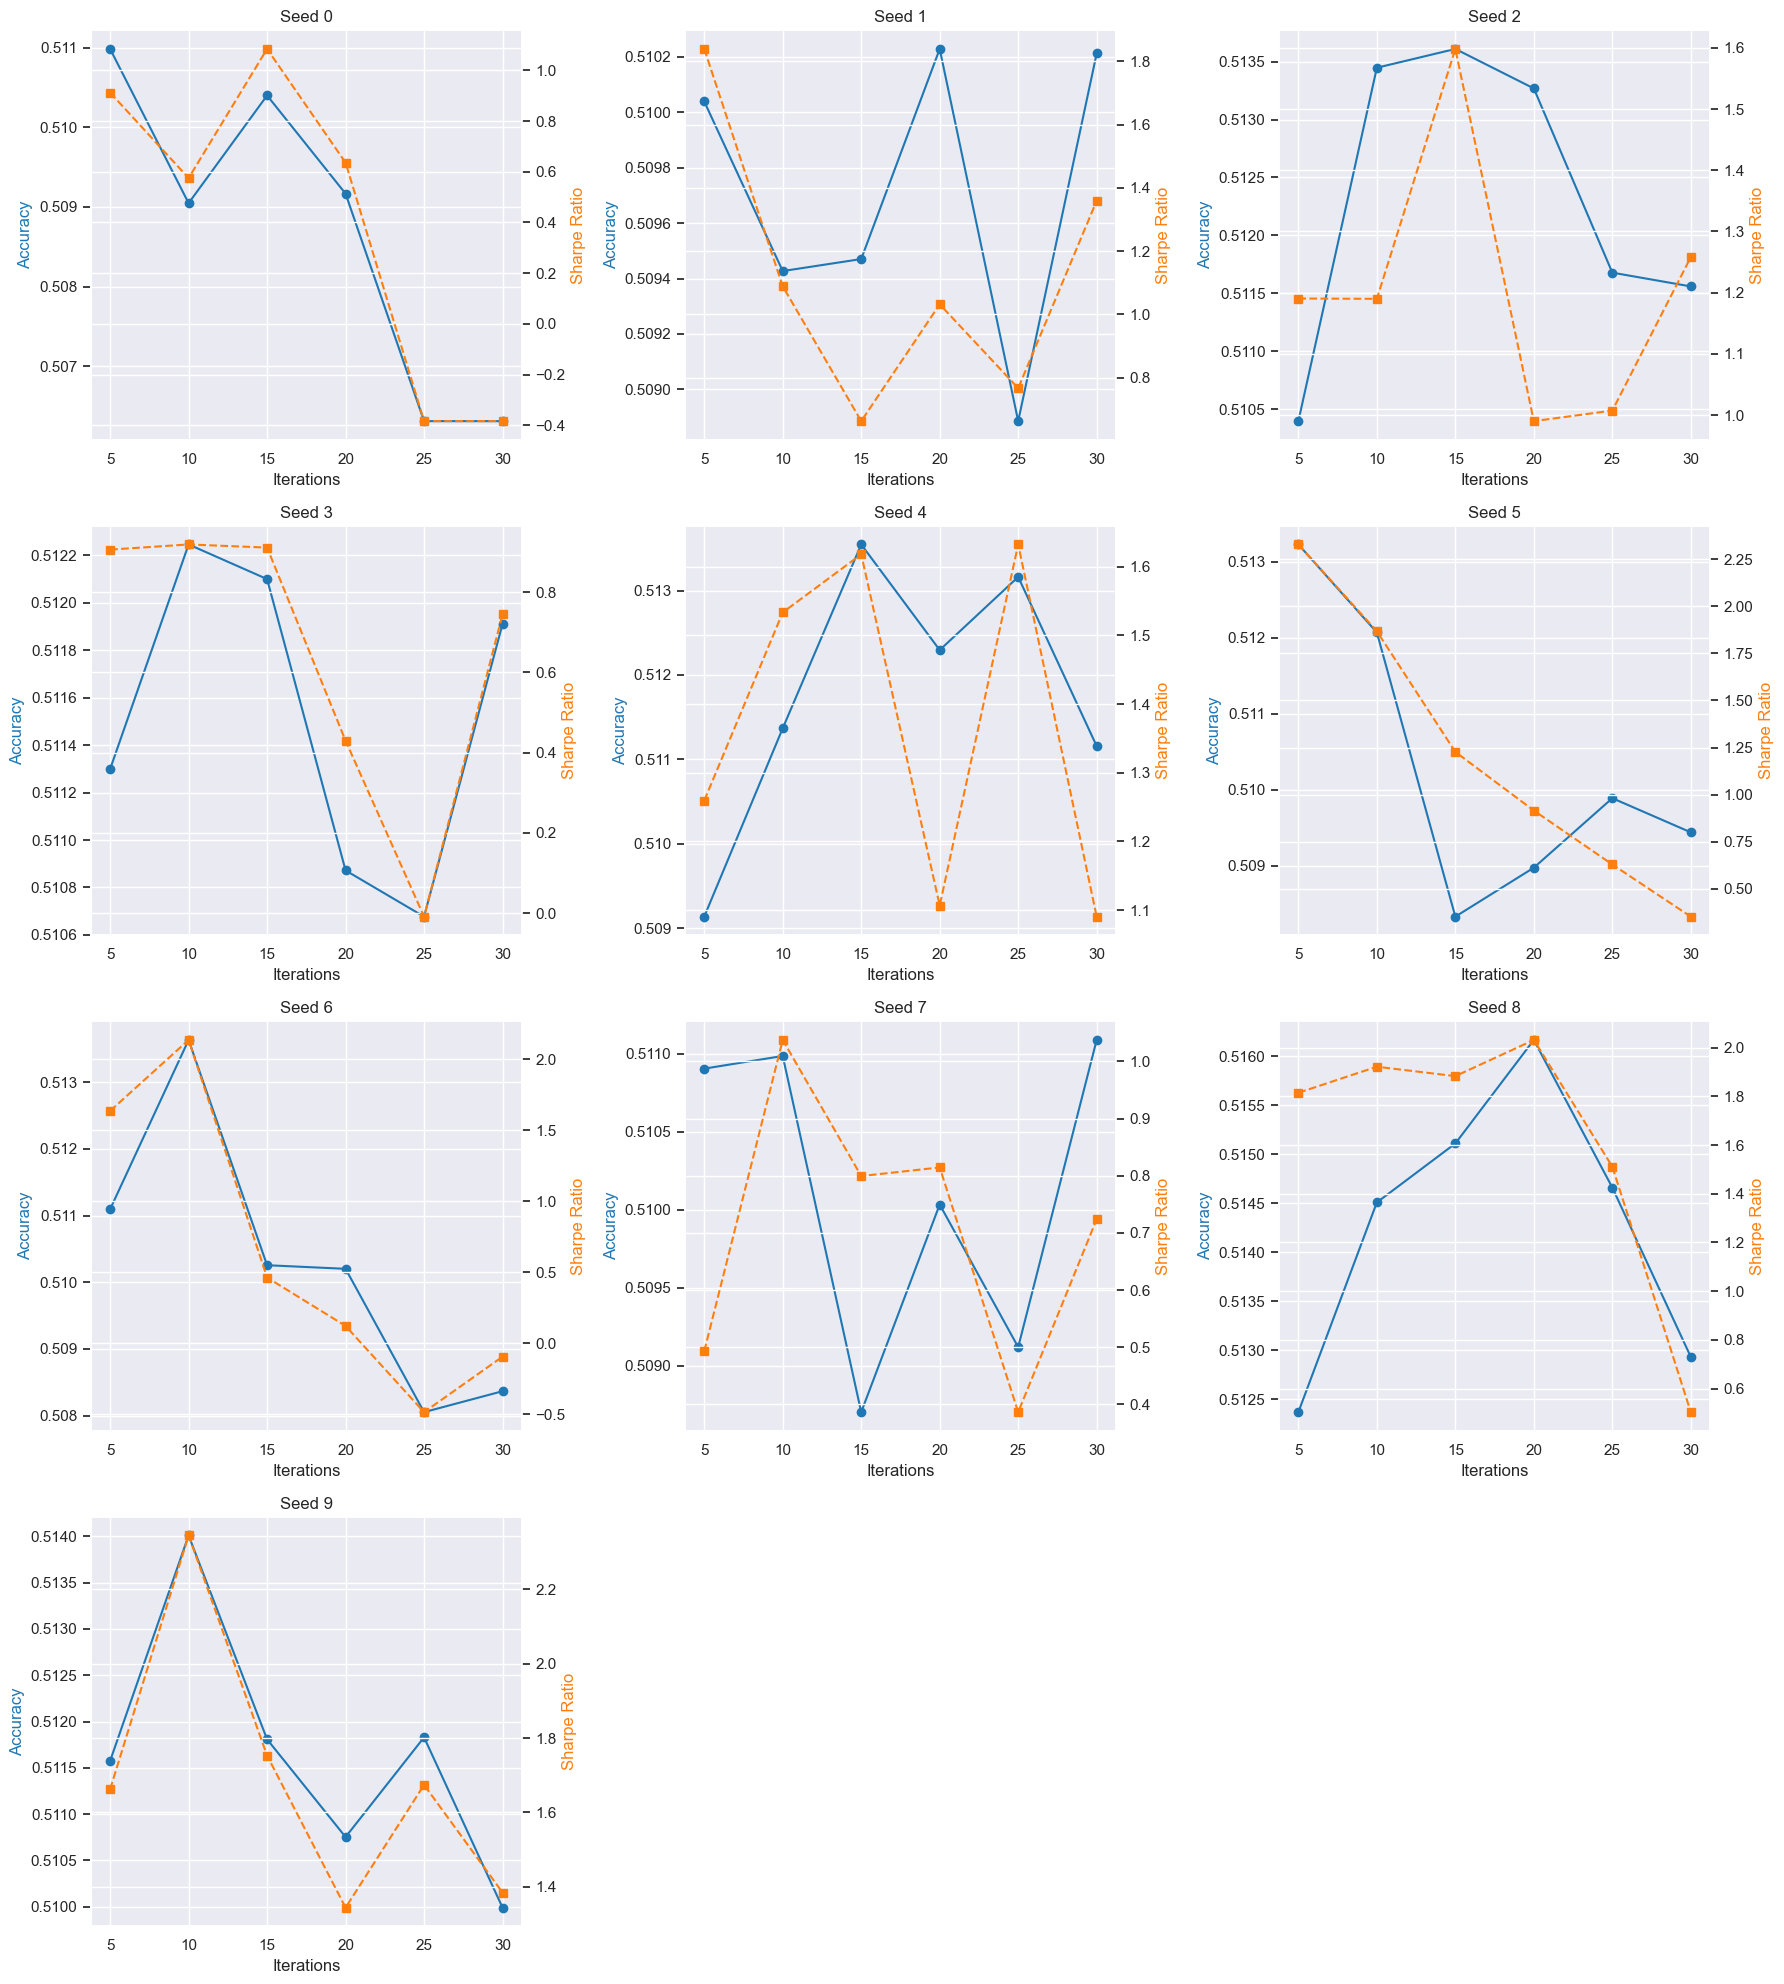

In [37]:
# Get unique seeds
seeds = df_results['seed'].unique()
n_seeds = len(seeds)

# Create subplots: adapt the number of rows and columns as needed
ncols = 3
nrows = (n_seeds + ncols - 1) // ncols  # ceiling division

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 5*nrows), squeeze=False)

for idx, seed in enumerate(seeds):
    row, col = divmod(idx, ncols)
    ax = axes[row][col]
    
    subset = df_results[df_results['seed'] == seed]
    
    # Plot accuracy on primary y-axis
    ax.plot(subset['iterations'], subset['accuracy'], marker='o', color='tab:blue', label='Accuracy')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Accuracy', color='tab:blue')
    # ax.tick_params(axis='y', labelcolor='tab:blue')
    
    # Create secondary y-axis for sharpe_ratio
    ax2 = ax.twinx()
    ax2.plot(subset['iterations'], subset['sharpe'], marker='s', linestyle='--', color='tab:orange', label='Sharpe Ratio')
    ax2.set_ylabel('Sharpe Ratio', color='tab:orange')
    # ax2.tick_params(axis='y', labelcolor='tab:orange')
    
    ax.set_title(f'Seed {seed}')
    ax.grid(True)

# Hide any unused subplots
for idx in range(n_seeds, nrows * ncols):
    row, col = divmod(idx, ncols)
    axes[row][col].axis('off')

plt.tight_layout()
plt.show()


## Old Backtesting analysis

In [17]:
y_pred_train = mlp.predict(X_train)

result_df_train = train_df[['SYMBOL', 'DATETIME', 'LOG_RETURN', 'NEXT_LOG_RETURN', 'NEXT_DIRECTION']].copy()

result_df_train['NEXT_DIRECTION'] = np.where(result_df_train['NEXT_DIRECTION'] == 1, 1, 0)
result_df_train['PREDICTION'] = y_pred_train
result_df_train['CORRECT'] = result_df_train['NEXT_DIRECTION'] == result_df_train['PREDICTION']

result_df_train

,SYMBOL,DATETIME,LOG_RETURN,NEXT_LOG_RETURN,NEXT_DIRECTION,PREDICTION,CORRECT
89298,CRWD,2021-12-02 13:10:00,-0.011525,-0.005318,0,1,False
192960,IQV,2021-12-02 13:10:00,0.000592,0.001355,1,1,True
27648,ANSS,2021-12-02 13:10:00,-0.000229,0.000255,1,1,True
169552,HCA,2021-12-02 13:10:00,-0.004629,-0.000537,0,1,False
154504,GD,2021-12-02 13:10:00,-0.000026,0.001920,1,0,False
...,...,...,...,...,...,...,...
299669,PNC,2021-12-16 14:20:00,-0.000221,-0.003590,0,0,True
154055,FTV,2021-12-16 14:20:00,0.000530,-0.002386,0,0,True
104733,DG,2021-12-16 14:20:00,0.002857,-0.000597,0,0,True
276261,NWSA,2021-12-16 14:20:00,-0.000464,-0.001392,0,0,True


In [18]:
N = 100

best_symbols = result_df_train.groupby('SYMBOL')['CORRECT'].mean().sort_values(ascending=False).index[:N].tolist()
best_symbols_trimmed = result_df_train.groupby('SYMBOL')['CORRECT'].mean().sort_values(ascending=False).index[int(N*0.1):N].tolist()

result_df_train.groupby('SYMBOL')['CORRECT'].mean().sort_values(ascending=False)

SYMBOL
TPL     0.666667
TEL     0.636598
CAT     0.635659
COP     0.633075
SYF     0.630491
          ...   
NEM     0.488372
PEP     0.485788
CHRW    0.483204
CHD     0.480620
NVR     0.453237
Name: CORRECT, Length: 479, dtype: float64

Sharpe Ratio (Strategy): 0.7689
Max Drawdown (Strategy): -0.0200


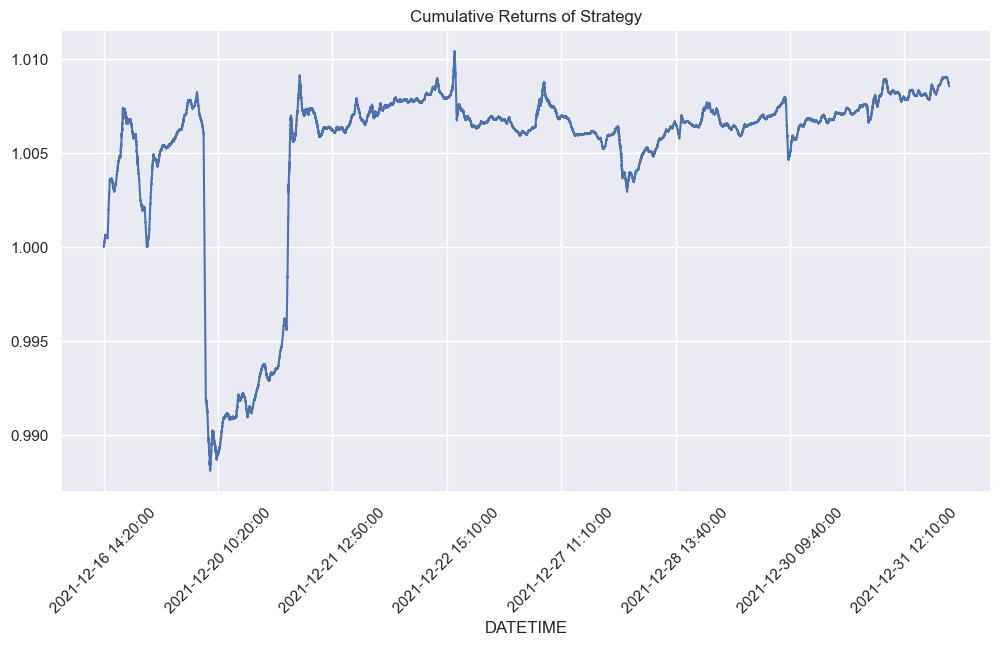

In [19]:
result_df = test_df[['SYMBOL', 'DATETIME', 'LOG_RETURN', 'NEXT_LOG_RETURN','NEXT_DIRECTION', 'PREDICTION'] \
                    + [col for col in df.columns if col.startswith(('DAY', 'HOUR'))]].set_index(['DATETIME'])

# result_df = result_df[result_df['SYMBOL'].isin(best_symbols)].copy()

result_df.loc[:,'NEXT_RETURN'] = np.exp(result_df['NEXT_LOG_RETURN']) - 1

result_df.loc[:,'PREDICTION'] = np.where(result_df['PREDICTION'] == 1, 1, -1)

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN']
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN'] / result_df['SYMBOL'].nunique()
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

sharpe_ratio_strategy = compute_sharpe_ratio(result_df['ret_strategy'])
max_drawdown_strategy = compute_max_drawdown(result_df['cumprod_strategy'])

print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.4f}")

result_df['cumprod_strategy'].plot(figsize=(12, 6), title='Cumulative Returns of Strategy', grid=True)
plt.xticks(rotation=45)
plt.show()

In [20]:
day_columns = [col for col in result_df.columns if col.startswith('DAY_')]
result_df['DAY_OF_THE_WEEK'] = result_df[day_columns].idxmax(axis=1).str.extract(r'DAY_(\d)').astype(int)
result_df.drop(columns=day_columns, inplace=True)

hour_columns = [col for col in result_df.columns if col.startswith('HOUR_')]
result_df['HOUR_OF_DAY'] = result_df[hour_columns].idxmax(axis=1).str.extract(r'HOUR_(\d+)').astype(int)
result_df.drop(columns=hour_columns, inplace=True)

result_df['CORRECT'] = result_df['NEXT_DIRECTION'] == result_df['PREDICTION']

In [21]:
# result_df.groupby('SYMBOL')['CORRECT'].mean().sort_values(ascending=False).index[:N]#.tolist()

In [22]:
best_test_symbols = result_df.groupby('SYMBOL')['CORRECT'].mean().sort_values(ascending=False).index[:N].tolist()

common_symbols = set(best_symbols) & set(best_test_symbols)

len(common_symbols), len(best_symbols), len(best_test_symbols)

(21, 100, 100)

In [23]:
# Let's assume you already have result_df, best_symbols, best_test_symbols

# Create dictionary for in-sample accuracies
symbol_accuracy = result_df.groupby('SYMBOL')['CORRECT'].mean().to_dict()

# Get the intersection
common_symbols = set(best_symbols) & set(best_test_symbols)

# Create dict for in-sample positions (starting at 1)
best_symbols_rank = {symbol: rank+1 for rank, symbol in enumerate(best_symbols)}

# Collect info for common symbols
data = []
for symbol in common_symbols:
    position_in_sample = best_symbols_rank[symbol]
    accuracy_in_sample = symbol_accuracy[symbol]
    data.append({
        'SYMBOL': symbol,
        'IN_SAMPLE_POSITION': position_in_sample,
        'IN_SAMPLE_ACCURACY': accuracy_in_sample
    })

# Convert to DataFrame for easy analysis
import pandas as pd
df_common = pd.DataFrame(data)

# Sort to see the distribution (optional)
df_common = df_common.sort_values('IN_SAMPLE_POSITION')

# Quick stats
df_common.describe()


,IN_SAMPLE_POSITION,IN_SAMPLE_ACCURACY
count,21.000000,21.000000
mean,54.761905,0.541019
std,23.254902,0.011297
min,3.000000,0.524548
25%,42.000000,0.530928
50%,53.000000,0.541237
75%,68.000000,0.548969
max,98.000000,0.561856


In [24]:
df_common

,SYMBOL,IN_SAMPLE_POSITION,IN_SAMPLE_ACCURACY
1,CAT,3,0.530928
0,ITW,19,0.524548
14,MSFT,30,0.561856
4,NTRS,33,0.532300
3,DTE,41,0.555556
18,COF,42,0.542636
2,AXP,44,0.524548
15,MTB,49,0.545220
10,PRU,50,0.556701
9,MMC,52,0.541237


Sharpe Ratio (Strategy): 1.3841
Max Drawdown (Strategy): -0.0246


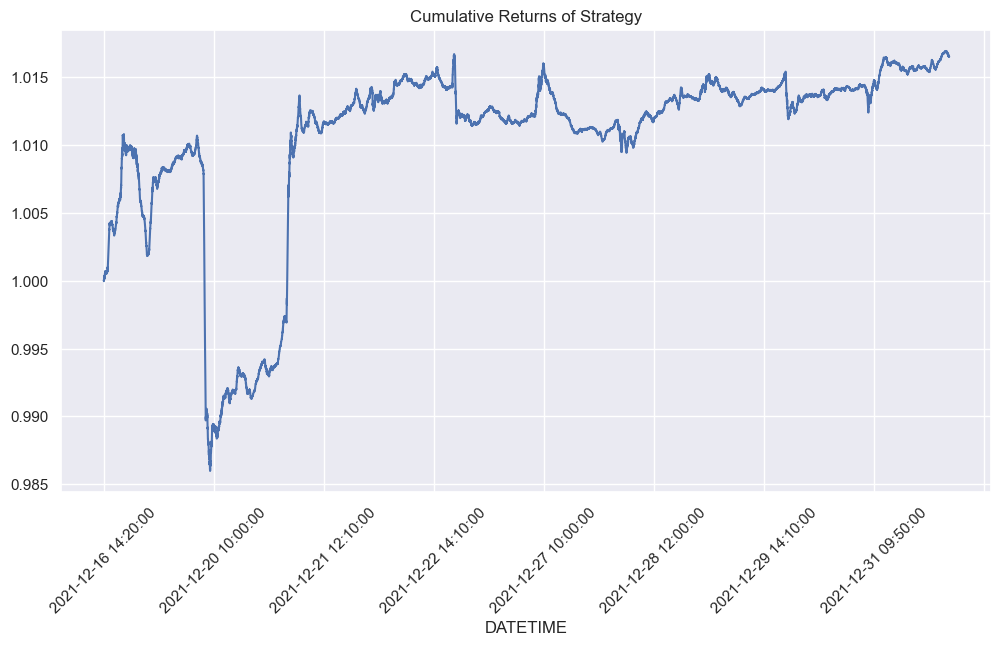

In [25]:
result_df = test_df[['SYMBOL', 'DATETIME', 'LOG_RETURN', 'NEXT_LOG_RETURN','NEXT_DIRECTION', 'PREDICTION'] \
                    + [col for col in df.columns if col.startswith(('DAY', 'HOUR'))]].set_index(['DATETIME'])

result_df = result_df[result_df['SYMBOL'].isin(best_symbols)].copy()

result_df.loc[:,'NEXT_RETURN'] = np.exp(result_df['NEXT_LOG_RETURN']) - 1

result_df.loc[:,'PREDICTION'] = np.where(result_df['PREDICTION'] == 1, 1, -1)

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN']
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN'] / len(best_symbols)
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

sharpe_ratio_strategy = compute_sharpe_ratio(result_df['ret_strategy'])
max_drawdown_strategy = compute_max_drawdown(result_df['cumprod_strategy'])

print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.4f}")

result_df['cumprod_strategy'].plot(figsize=(12, 6), title='Cumulative Returns of Strategy', grid=True)
plt.xticks(rotation=45)
plt.show()

Sharpe Ratio (Strategy): 1.4464
Max Drawdown (Strategy): -0.0235


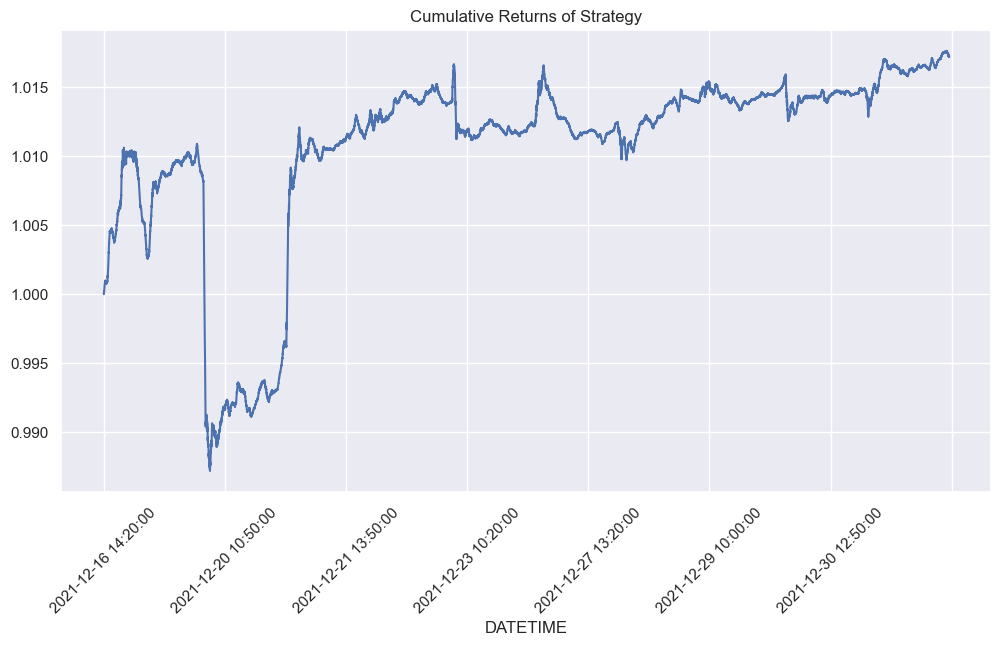

In [26]:
result_df = test_df[['SYMBOL', 'DATETIME', 'LOG_RETURN', 'NEXT_LOG_RETURN','NEXT_DIRECTION', 'PREDICTION'] \
                    + [col for col in df.columns if col.startswith(('DAY', 'HOUR'))]].set_index(['DATETIME'])

result_df = result_df[result_df['SYMBOL'].isin(best_symbols_trimmed)].copy()

result_df.loc[:,'NEXT_RETURN'] = np.exp(result_df['NEXT_LOG_RETURN']) - 1

result_df.loc[:,'PREDICTION'] = np.where(result_df['PREDICTION'] == 1, 1, -1)

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN']
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN'] / len(best_symbols_trimmed)
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

sharpe_ratio_strategy = compute_sharpe_ratio(result_df['ret_strategy'])
max_drawdown_strategy = compute_max_drawdown(result_df['cumprod_strategy'])

print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.4f}")

result_df['cumprod_strategy'].plot(figsize=(12, 6), title='Cumulative Returns of Strategy', grid=True)
plt.xticks(rotation=45)
plt.show()

Sharpe Ratio (Strategy): 4.4798
Max Drawdown (Strategy): -0.0271


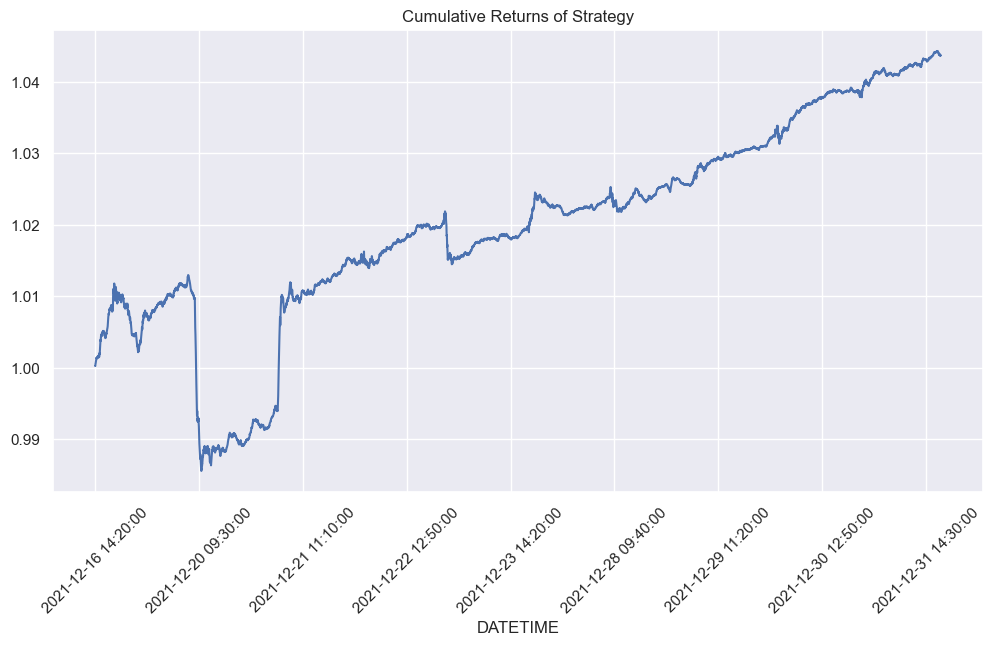

In [27]:
result_df = test_df[['SYMBOL', 'DATETIME', 'LOG_RETURN', 'NEXT_LOG_RETURN','NEXT_DIRECTION', 'PREDICTION'] \
                    + [col for col in df.columns if col.startswith(('DAY', 'HOUR'))]].set_index(['DATETIME'])

result_df = result_df[result_df['SYMBOL'].isin(common_symbols)].copy()

result_df.loc[:,'NEXT_RETURN'] = np.exp(result_df['NEXT_LOG_RETURN']) - 1

result_df.loc[:,'PREDICTION'] = np.where(result_df['PREDICTION'] == 1, 1, -1)

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN']
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

result_df.loc[:,'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN'] / len(common_symbols)
result_df.loc[:,'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

sharpe_ratio_strategy = compute_sharpe_ratio(result_df['ret_strategy'])
max_drawdown_strategy = compute_max_drawdown(result_df['cumprod_strategy'])

print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.4f}")

result_df['cumprod_strategy'].plot(figsize=(12, 6), title='Cumulative Returns of Strategy', grid=True)
plt.xticks(rotation=45)
plt.show()

In [28]:
# result_df.groupby('DAY_OF_THE_WEEK')['CORRECT'].mean().sort_values(ascending=False)

In [29]:
# result_df.groupby('HOUR_OF_DAY')['CORRECT'].mean().sort_values(ascending=False)

In [30]:
def compute_cumprod_strategy(symbol_list, label):
    result_df = test_df[['SYMBOL', 'DATETIME', 'LOG_RETURN', 'NEXT_LOG_RETURN','NEXT_DIRECTION', 'PREDICTION'] \
                        + [col for col in df.columns if col.startswith(('DAY', 'HOUR'))]].set_index(['DATETIME'])

    result_df = result_df[result_df['SYMBOL'].isin(symbol_list)].copy()

    result_df.loc[:, 'NEXT_RETURN'] = np.exp(result_df['NEXT_LOG_RETURN']) - 1
    result_df.loc[:, 'PREDICTION'] = np.where(result_df['PREDICTION'] == 1, 1, -1)
    result_df.loc[:, 'ret_strategy'] = result_df['PREDICTION'] * result_df['NEXT_RETURN'] / len(symbol_list)
    result_df.loc[:, 'cumprod_strategy'] = (1 + result_df['ret_strategy']).cumprod()

    sharpe_ratio_strategy = compute_sharpe_ratio(result_df['ret_strategy'])
    max_drawdown_strategy = compute_max_drawdown(result_df['cumprod_strategy'])

    print(f"{label} - Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
    print(f"{label} - Max Drawdown (Strategy): {max_drawdown_strategy:.4f}")

    return result_df['cumprod_strategy']

All Symbols (Benchmark) - Sharpe Ratio (Strategy): 0.7689
All Symbols (Benchmark) - Max Drawdown (Strategy): -0.0200
Best In Sample - Sharpe Ratio (Strategy): 1.3841
Best In Sample - Max Drawdown (Strategy): -0.0246
Best Trimmed - Sharpe Ratio (Strategy): 1.4464
Best Trimmed - Max Drawdown (Strategy): -0.0235
Common Symbols - Sharpe Ratio (Strategy): 4.4798
Common Symbols - Max Drawdown (Strategy): -0.0271


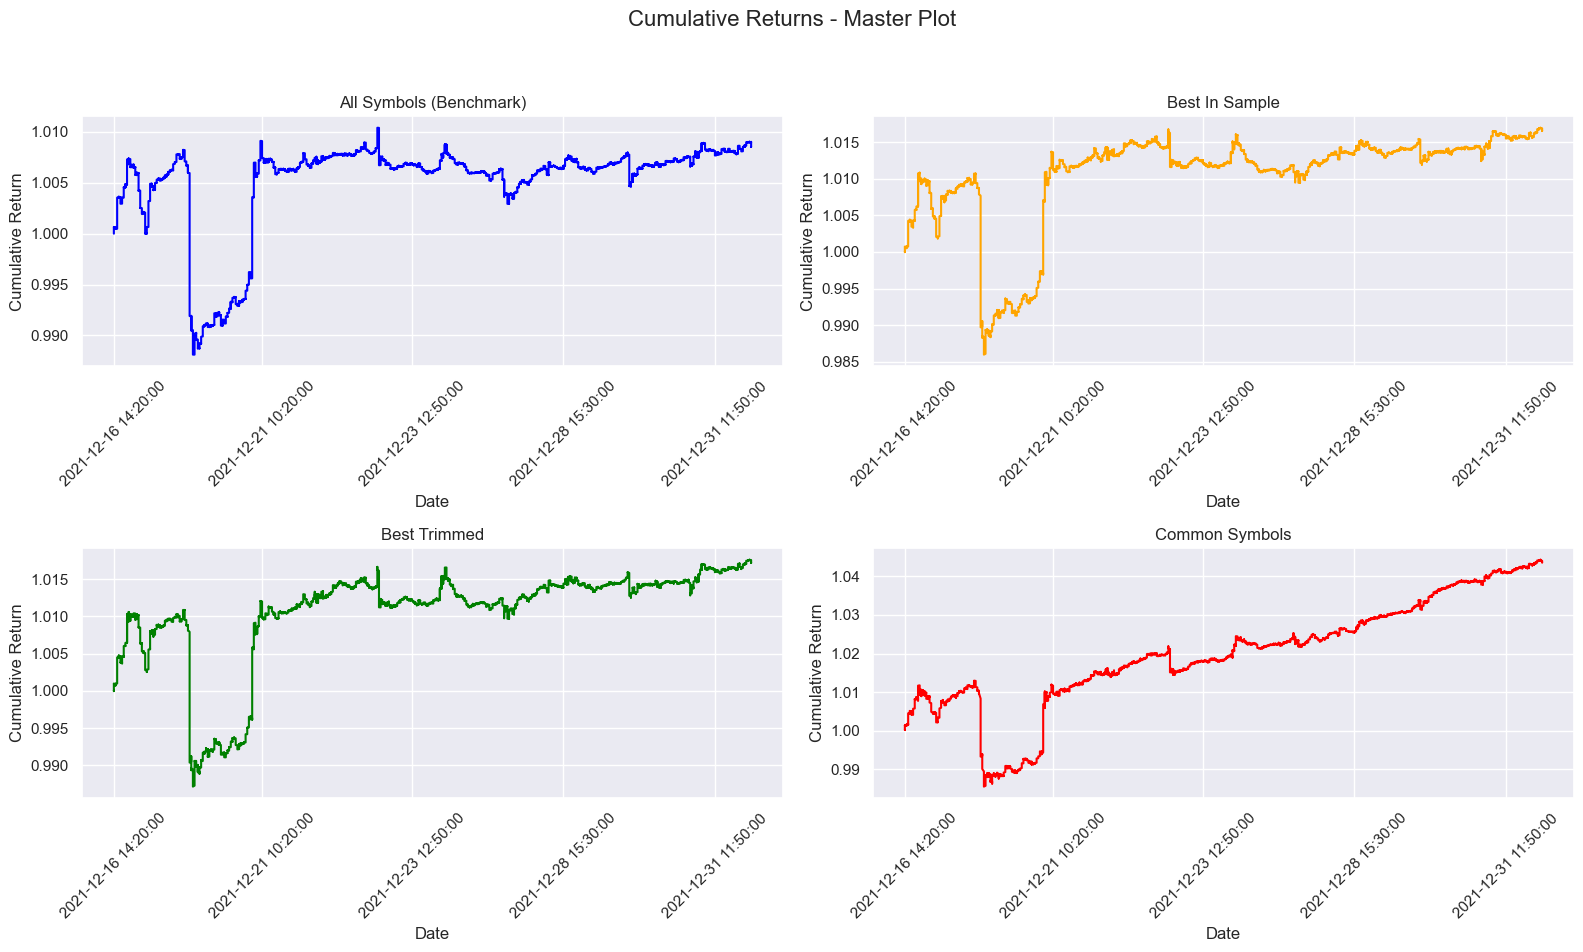

In [31]:
import matplotlib.dates as mdates

# Compute the cumulative returns as before
cumprod_1 = compute_cumprod_strategy(test_df['SYMBOL'].unique(), 'All Symbols (Benchmark)')
cumprod_2 = compute_cumprod_strategy(best_symbols, 'Best In Sample')
cumprod_3 = compute_cumprod_strategy(best_symbols_trimmed, 'Best Trimmed')
cumprod_4 = compute_cumprod_strategy(common_symbols, 'Common Symbols')

# Create master plot with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=False)

# Subplot 1
axs[0, 0].plot(cumprod_1, color='blue')
axs[0, 0].set_title('All Symbols (Benchmark)')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Cumulative Return')
axs[0, 0].grid(True)

# Subplot 2
axs[0, 1].plot(cumprod_2, color='orange')
axs[0, 1].set_title('Best In Sample')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Cumulative Return')
axs[0, 1].grid(True)

# Subplot 3
axs[1, 0].plot(cumprod_3, color='green')
axs[1, 0].set_title('Best Trimmed')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Cumulative Return')
axs[1, 0].grid(True)

# Subplot 4
axs[1, 1].plot(cumprod_4, color='red')
axs[1, 1].set_title('Common Symbols')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Cumulative Return')
axs[1, 1].grid(True)

# Rotate xticks for all subplots
for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("Cumulative Returns - Master Plot", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
